<a href="https://colab.research.google.com/github/fsenchyna/CSC869_Term_Project/blob/fiona/beeimage-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bee image classification with a convolutional neural network (CNN).

- Make sure GPU is used (Edit -> notebook settings -> hardware accelerator = GPU)
- Inspiration: https://www.youtube.com/watch?app=desktop&v=qFJeN9V1ZsI (Next step: 1:36:45 -> pretrained model)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Import image data into colab environment as accessing images is very slow from drive. Must first put the train,validate,test folders into a folder called 'beehives' and zip. Then add this to your google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = '/content/drive/MyDrive/image_processing/beehives.zip'

In [4]:
!cp "{zip_path}" .
!unzip -q beehives.zip
!rm beehives.zip

Process images so that they can be used by the CNN

In [5]:
train_path = 'beehives/Train'
valid_path = 'beehives/Validate'
test_path = 'beehives/Test'

In [6]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224, 224), \
classes=['AntProblem', 'FewVarraoHiveBeetles', 'Healthy', 'HiveBeingRobbed', \
'MissingQueen', 'VarroaSmallHiveBeetles'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224, 224), \
classes=['AntProblem', 'FewVarraoHiveBeetles', 'Healthy', 'HiveBeingRobbed', \
'MissingQueen', 'VarroaSmallHiveBeetles'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224, 224), \
classes=['AntProblem', 'FewVarraoHiveBeetles', 'Healthy', 'HiveBeingRobbed', \
'MissingQueen', 'VarroaSmallHiveBeetles'], batch_size=10, shuffle=False)

Found 3566 images belonging to 6 classes.
Found 1027 images belonging to 6 classes.
Found 579 images belonging to 6 classes.


This function was taken directly from TensorFlows website, used to preview images in the generator

In [7]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

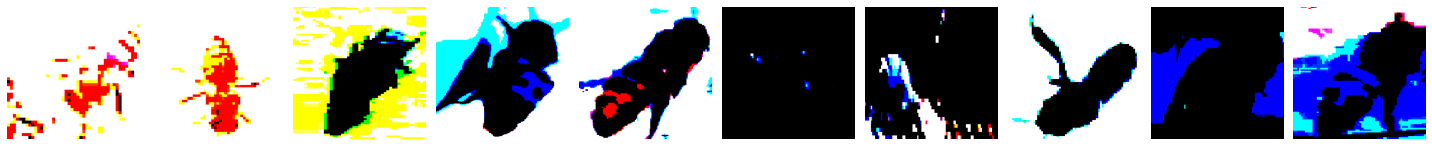

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [8]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

Build simple CNN model

In [9]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'), 
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    Flatten(),
                    Dense(units=6, activation='softmax'),
])

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

train model with images in the train and validate folders. Run the images throught the model ten times (epochs=10)

In [11]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
357/357 - 41s - loss: 7.0298 - accuracy: 0.8155 - val_loss: 4.3348 - val_accuracy: 0.7556
Epoch 2/10
357/357 - 7s - loss: 0.3463 - accuracy: 0.9459 - val_loss: 1.9382 - val_accuracy: 0.8345
Epoch 3/10
357/357 - 7s - loss: 0.1068 - accuracy: 0.9725 - val_loss: 2.1571 - val_accuracy: 0.8481
Epoch 4/10
357/357 - 7s - loss: 0.1102 - accuracy: 0.9776 - val_loss: 1.7576 - val_accuracy: 0.8277
Epoch 5/10
357/357 - 7s - loss: 0.0276 - accuracy: 0.9924 - val_loss: 2.2800 - val_accuracy: 0.8092
Epoch 6/10
357/357 - 7s - loss: 0.0085 - accuracy: 0.9975 - val_loss: 1.8417 - val_accuracy: 0.8228
Epoch 7/10
357/357 - 7s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.7473 - val_accuracy: 0.8364
Epoch 8/10
357/357 - 7s - loss: 2.4484e-04 - accuracy: 1.0000 - val_loss: 1.7867 - val_accuracy: 0.8335
Epoch 9/10
357/357 - 7s - loss: 1.4176e-04 - accuracy: 1.0000 - val_loss: 1.7588 - val_accuracy: 0.8423
Epoch 10/10
357/357 - 7s - loss: 1.0738e-04 - accuracy: 1.0000 - val_loss: 1.7429 - val_acc

Use the trained cnn model to predict the images in the test set

In [12]:
predictions = model.predict(x=test_batches, verbose=0)

Round up the predictions so that the highest predicted class is labeled 1 (true) and the other classes are labeled 0 (false), otherwise model will output a percentage confidence for each label for each image in the test set

In [13]:
np.round(predictions)

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)